# Modelli 1PL, 2PL e 3PL {#sec-rasch-beyond}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [8]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(
    eRm, mirt, grid, TAM, ggmirt, psychotools, latex2exp
)

## Introduzione

Nell'ambito dei modelli IRT, il modello di Rasch impone i vincoli più restrittivi. Tali vincoli possono essere rilassati progressivamente definendo quelli che vengono chiamati modelli 1PL, 2PL e 3PL.

## Un Esempio Pratico

In questo capitolo, utilizzeremo nuovamente i dati che abbiamo esaminato in precedenza nel @sec-rasch-estimation. 

In [9]:
data(data.fims.Aus.Jpn.scored, package = "TAM")
fims <- data.fims.Aus.Jpn.scored

Esaminiamo le risposte dei primi 400 partecipanti. Per facilitare la manipolazione dei dati, cambiamo il nome delle colonne.

In [10]:
responses <- fims[1:400, 2:15]
colnames(responses) <- gsub("M1PTI", "I", colnames(responses))
glimpse(responses)

Rows: 400
Columns: 14
$ I1  <dbl> 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,~
$ I2  <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,~
$ I3  <dbl> 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,~
$ I6  <dbl> 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,~
$ I7  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ I11 <dbl> 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,~
$ I12 <dbl> 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ I14 <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,~
$ I17 <dbl> 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,~
$ I18 <dbl> 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,~
$ I19 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ I21 <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,~
$ I22 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
gender <- as.factor(fims$SEX[1:400])
levels(gender) <- c("male", "female")

## Modello 1PL

Il **modello ad un parametro logistico (1PL)** può essere espresso matematicamente come:

$$
P(X_i = 1 \mid \theta_v, \alpha, \delta_i) = \frac{\exp(\alpha(\theta_v - \delta_i))}{1 + \exp(\alpha(\theta_v - \delta_i))} = \frac{1}{1 + \exp(-\alpha(\theta_v - \delta_i))}, \tag{1}
$$

dove:

- $\theta_v$: livello di abilità del rispondente $v$,
- $\delta_i$: parametro di difficoltà dell'item $i$,
- $\alpha$: parametro di discriminazione dell'item.

Nel modello 1PL, **$\alpha$** è fisso e uguale per tutti gli item, il che implica che la capacità di discriminazione è costante. L'assenza di un pedice per $\alpha$ riflette questa assunzione.

### **Interpretazione del parametro $\alpha$**

Il parametro $\alpha$ è direttamente collegato alla **pendenza della curva caratteristica dell'item (ICC)** e definisce quanto bene un item discrimina tra individui con diversi livelli di abilità $\theta$. Un $\alpha$ più grande produce una curva ICC più ripida, indicando una maggiore capacità dell'item di differenziare tra rispondenti con abilità vicine alla difficoltà dell'item ($\delta_i$).

Nel modello 1PL:

- Gli item con $\alpha = 0$ non discriminano e non forniscono informazioni utili.
- Gli item con $\alpha > 0$ hanno potere discriminatorio proporzionale al valore di $\alpha$.

::: {#exr-}
Supponiamo di avere tre item ($i_1, i_2, i_3$), tutti con difficoltà $\delta = 0$, e tre valori di discriminazione: $\alpha_1 = 0.0$, $\alpha_2 = 1.0$ e $\alpha_3 = 2.0$. Consideriamo due rispondenti: rispondente A con $\theta_A = -1$ e rispondente B con $\theta_B = 1$.

**Item con $\alpha = 0.0$.** la curva ICC per l'item $i_1$ è orizzontale ($\alpha = 0.0$), indicando che la probabilità di risposta corretta è costante e pari a $0.5$ per tutti i livelli di $\theta$:

$$
P(X_i = 1 \mid \theta, \delta) = 0.5.
$$

In questo caso, l'item non discrimina tra rispondenti con abilità diverse e non fornisce alcuna informazione utile.

**Item con $\alpha = 1.0$.** Con $\alpha = 1.0$, le probabilità di risposta corretta per i rispondenti A e B sono calcolate come:

$$
P(X_i = 1 \mid \theta, \delta) = \frac{1}{1 + \exp(-(\theta - \delta))}.
$$

- Per $\theta_A = -1$: $P(X_i = 1) = 0.2689$,
- Per $\theta_B = 1$: $P(X_i = 1) = 0.7311$.

L'item ora discrimina meglio tra i due rispondenti, producendo probabilità diverse.

**Item con $\alpha = 2.0$.** Con $\alpha = 2.0$, la curva ICC è più ripida. Le probabilità di risposta corretta sono:

$$
P(X_i = 1 \mid \theta, \delta) = \frac{1}{1 + \exp(-2(\theta - \delta))}.
$$

- Per $\theta_A = -1$: $P(X_i = 1) = 0.1192$,
- Per $\theta_B = 1$: $P(X_i = 1) = 0.8808$.

La maggiore ripidità della curva ICC riflette una capacità superiore di discriminare tra rispondenti con abilità diverse.

In conclusione, un aumento di $\alpha$ produce una curva ICC più ripida, migliorando la capacità dell'item di distinguere tra rispondenti con abilità vicine alla sua difficoltà. Al contrario, una diminuzione di $\alpha$ rende la curva ICC più piatta, riducendo la capacità discriminatoria dell'item.
:::

### Modello di Rasch e Modello 1PL

Il **modello 1PL** e il **modello di Rasch** condividono l'assunzione di un parametro di discriminazione ($\alpha$) costante per tutti gli item, pur consentendo che gli item differiscano in termini di difficoltà ($\delta_i$). Tuttavia, nel modello di Rasch, $\alpha$ è fissato a 1.0, mentre nel modello 1PL, $\alpha$ può assumere un valore costante diverso da 1.0. Nonostante questa differenza, i due modelli sono matematicamente equivalenti: i parametri stimati in uno possono essere trasformati nell'altro tramite una riscalatura appropriata.

#### Differenze concettuali tra modello di Rasch e modello 1PL

Oltre agli aspetti matematici, i due modelli differiscono nella filosofia sottostante:

- Il **modello 1PL** è orientato a ottimizzare l'adattamento ai dati osservati, cercando di descrivere il dataset nel miglior modo possibile all'interno della struttura del modello.
- Il **modello di Rasch**, invece, viene utilizzato come strumento per costruire la variabile di interesse, assumendo che il modello definisca una misura oggettiva della latente. Questo approccio si concentra sullo sviluppo di uno strumento di misurazione valido, piuttosto che sull'adattamento ai dati.

Secondo questa prospettiva filosofica, il modello di Rasch non è solo un mezzo per analizzare i dati, ma uno standard per progettare e costruire strumenti di misura. Questa visione è stata approfondita da studiosi come Andrich (1988), Wilson (2005), Wright (1984), Wright & Masters (1982) e Wright & Stone (1979). 

#### Un’analogia con le scienze fisiche

La filosofia del modello di Rasch può essere paragonata alla misurazione di grandezze fisiche, come il tempo. Ad esempio:

- La misurazione del tempo si basa su un processo ripetitivo (ad esempio, l'oscillazione di un pendolo), che definisce unità costanti e uniformi.
- Analogamente, nel modello di Rasch, l'unità di misura è il **logit**, ossia la distanza sul continuum latente che corrisponde a un aumento del rapporto di successo di un fattore pari alla costante trascendentale $e$.

Questa unità è costante e consente di misurare la variabile latente con una metrica stabile, proprio come avviene nelle scienze fisiche. 

#### Terminologia adottata

Per semplificare la discussione, useremo il termine **modello 1PL** per riferirci sia al caso in cui $\alpha = 1.0$ (il modello di Rasch), sia al caso in cui $\alpha$ assume un altro valore costante. Tuttavia:

- Quando ci riferiamo specificamente al **modello di Rasch**, intendiamo la situazione in cui $\alpha = 1.0$.
- Inoltre, l'uso del termine "modello di Rasch" implica una visione filosofica secondo cui il modello è uno standard per la costruzione della variabile di interesse, piuttosto che un semplice strumento di adattamento ai dati.

---

In sintesi, il modello di Rasch e il modello 1PL possono essere considerati varianti di una stessa formulazione matematica, ma differiscono nel loro utilizzo e nella loro interpretazione concettuale. Il modello di Rasch si distingue per il suo ruolo nella costruzione di misure oggettive e per l'importanza attribuita alla definizione di una metrica latente stabile.

::: {#exr-}
In $\mathsf{R}$, il modello di Rasch si implementa nel modo seguente:

In [ ]:
mirt_rm <- mirt(responses, 1, "Rasch", verbose = FALSE)

Il modello 1PL si implementa nel modo seguente:

In [47]:
mirt_1pl <- mirt(responses, 1, "1PL", verbose = FALSE)

Confrontiamo i due modelli:

In [48]:
anova(mirt_rm, mirt_1pl)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mirt_rm,5663,5675,5687,5723,-2816,NA,NA,NA
mirt_1pl,5662,5673,5684,5718,-2817,-0.705,-1,NaN


I modelli `mirt_rm` e `mirt_1pl` sono praticamente equivalenti in termini di adattamento ai dati.
Il modello `mirt_1pl` mostra lievi miglioramenti nei criteri di informazione (AIC e BIC), ma la differenza è minima.
:::

::: {#exr-}
In questo esercizio, esploreremo il concetto di **discriminazione degli item** utilizzando Curve Caratteristiche dell’Item (ICC) per due item con discriminazioni diverse. L’obiettivo è evidenziare come il parametro di discriminazione ($\beta$) influisca sulla capacità di un item di distinguere tra rispondenti con diversi livelli di abilità ($\theta$).

La funzione sigmoide rappresenta l’ICC, calcolando la probabilità che un rispondente con abilità $\theta$ risponda correttamente a un item con discriminazione $\beta$ e difficoltà fissata a zero ($\delta = 0$):

In [13]:
sigmoid <- function(x, beta) {
    1 / (1 + exp(-beta * (x - 0)))
}

Consideriamo due item con discriminazioni diverse:

- Item 1: Discriminazione inferiore ($\beta = 1$),
- Item 2: Discriminazione superiore ($\beta = 2$).

Utilizziamo una sequenza di valori di abilità ($\theta$) da -2 a 2 per calcolare le probabilità previste per ciascun item.

In [14]:
# Sequenza di livelli di abilità
abilities <- seq(-2, 2, length.out = 100)

# Probabilità per gli item
probabilities_low <- sigmoid(abilities, beta = 1)
probabilities_high <- sigmoid(abilities, beta = 2)

Tracciamo le ICC per i due item, evidenziando come la curva diventi più ripida all’aumentare del parametro di discriminazione:

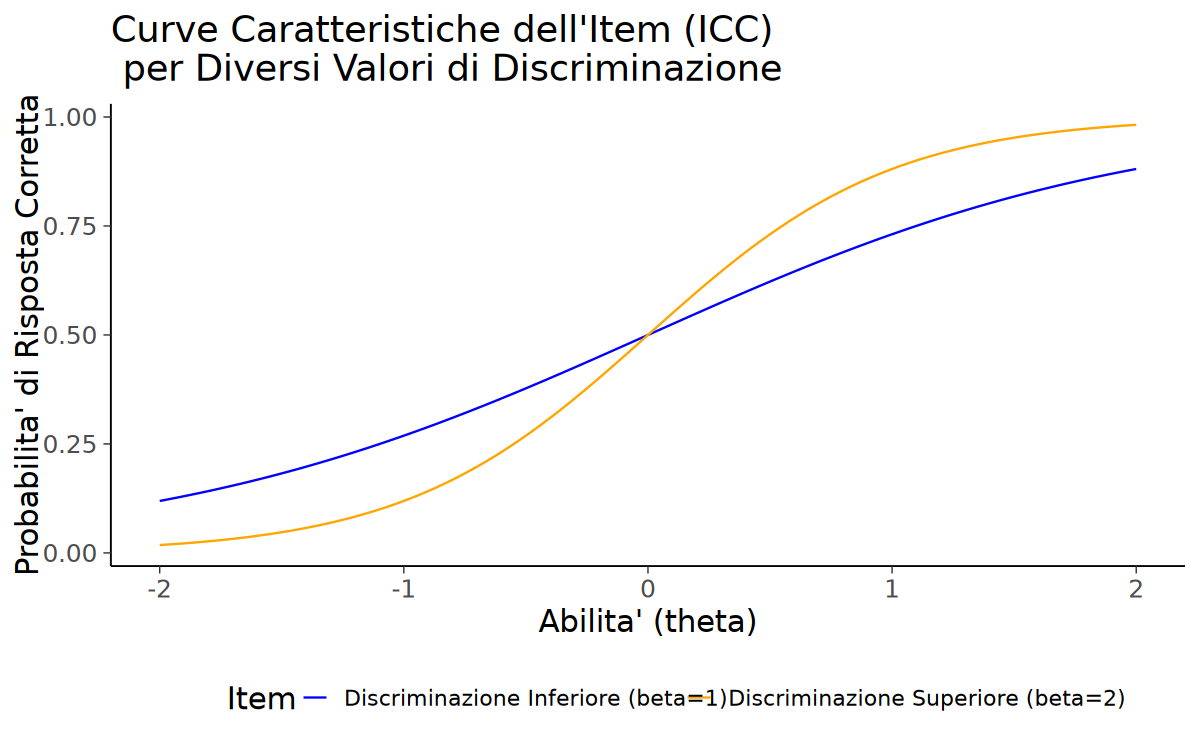

In [18]:
# Creazione del dataframe per ggplot
data <- data.frame(
    Ability = rep(abilities, 2),
    Probability = c(probabilities_low, probabilities_high),
    Item = rep(c("Discriminazione Inferiore (beta=1)", "Discriminazione Superiore (beta=2)"), each = 100)
)

# Creazione del grafico
ggplot(data, aes(x = Ability, y = Probability, color = Item)) +
    geom_line() +
    scale_color_manual(values = c("blue", "orange")) +
    ggtitle("Curve Caratteristiche dell'Item (ICC)\n per Diversi Valori di Discriminazione") +
    xlab("Abilita' (theta)") +
    ylab("Probabilita' di Risposta Corretta") +
    theme(legend.position = "bottom")

Calcoliamo la probabilità di risposta corretta per due livelli di abilità ($\theta = -0.5$ e $\theta = 0.5$) per entrambi gli item:

In [16]:
sigmoid(-0.5, 1) # Discriminazione inferiore
sigmoid(0.5, 1)

sigmoid(-0.5, 2) # Discriminazione superiore
sigmoid(0.5, 2)

[1] 0.378

[1] 0.622

[1] 0.269

[1] 0.731

**Risultati**:

- **Item con $\beta = 1$:**
  - $P(\theta = -0.5) = 0.38$, $P(\theta = 0.5) = 0.62$
  - Differenza: $0.62 - 0.38 = 0.24$
- **Item con $\beta = 2$:**
  - $P(\theta = -0.5) = 0.27$, $P(\theta = 0.5) = 0.73$
  - Differenza: $0.73 - 0.27 = 0.46$

**Interpretazione**

- Per l’item con discriminazione inferiore ($\beta = 1$), la differenza di probabilità tra i due rispondenti è minore, e la curva ICC è più piatta.
- Per l’item con discriminazione superiore ($\beta = 2$), la differenza di probabilità è maggiore, e la curva ICC è più ripida. Questo indica che l’item è più sensibile alle differenze nelle abilità dei rispondenti.

Il **parametro di discriminazione** può essere interpretato come una misura della **pendenza** della curva caratteristica dell'item (ICC) al centro, dove la curva assume un andamento quasi lineare. La pendenza è direttamente proporzionale al valore del parametro di discriminazione:

- Per un item con $\beta = 1$, la pendenza approssimata è $\frac{0.24}{1} = 0.24$,
- Per un item con $\beta = 2$, la pendenza approssimata è $\frac{0.46}{1} = 0.46$.

Questa relazione evidenzia come un valore maggiore di $\beta$ corrisponda a una curva ICC più ripida e a una maggiore capacità dell'item di distinguere tra rispondenti con abilità vicine.

**Confronto con il Modello di Rasch**

Nel modello di Rasch, il parametro di discriminazione è fisso a $\beta = 1$, il che implica che tutti gli item abbiano la stessa pendenza. Questo semplifica il modello, ma potrebbe non catturare differenze reali nella capacità discriminatoria degli item.

In conclusione, il parametro di discriminazione determina quanto efficacemente un item può distinguere tra rispondenti con abilità simili. Item con una maggiore discriminazione ($\beta$) presentano curve ICC più ripide e sono più sensibili alle differenze tra i livelli di abilità. 
:::

## Modello 2PL

Il **modello 2PL** (Modello IRT a due parametri) è un’estensione del modello 1PL che consente alle curve caratteristiche degli item (ICC) di avere pendenze diverse. Questo significa che, a differenza del modello 1PL e del modello di Rasch, le curve degli item non sono necessariamente parallele tra loro. 

Nel modello 2PL, ogni item è descritto da due parametri:

1. **Parametro di difficoltà ($b$)**: Rappresenta il livello di abilità necessario affinché la probabilità di risposta corretta sia pari al 50%.
2. **Parametro di discriminazione ($a$)**: Controlla la pendenza della curva ICC, cioè la capacità dell’item di distinguere tra rispondenti con abilità diverse.

La formula per le curve caratteristiche degli item nel modello 2PL è:

$$
P(X_i = 1 \mid \theta, a_i, b_i) = \frac{1}{1 + \exp(-a_i (\theta - b_i))},
$$

dove:

- $\theta$ è il livello di abilità del rispondente,
- $a_i$ è il parametro di discriminazione dell’item $i$,
- $b_i$ è il parametro di difficoltà dell’item $i$.

::: {#exr-}

Utilizziamo il pacchetto **mirt** per adattare il modello 2PL ai dati. La funzione `mirt()` permette di stimare i parametri del modello specificando la struttura 2PL:

In [24]:
mirt_2pl <- mirt(responses, 1, "2PL")

Iteration: 14, Log-Lik: -2759.601, Max-Change: 0.00009


Una volta adattato il modello, possiamo esaminare le curve ICC utilizzando il comando `plot()`:

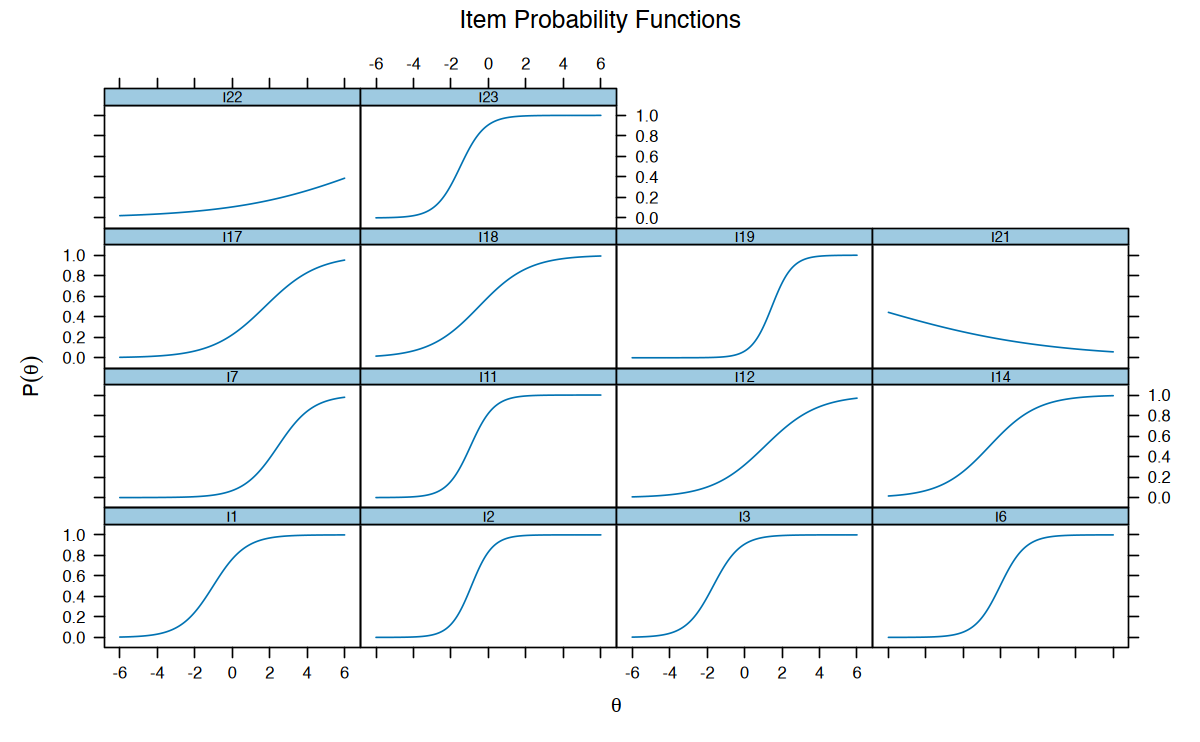

In [25]:
plot(mirt_2pl, type = "trace")

Se preferiamo visualizzare tutte le ICC in un singolo grafico (senza suddividere per item), possiamo aggiungere l’opzione `facet_items = FALSE`:

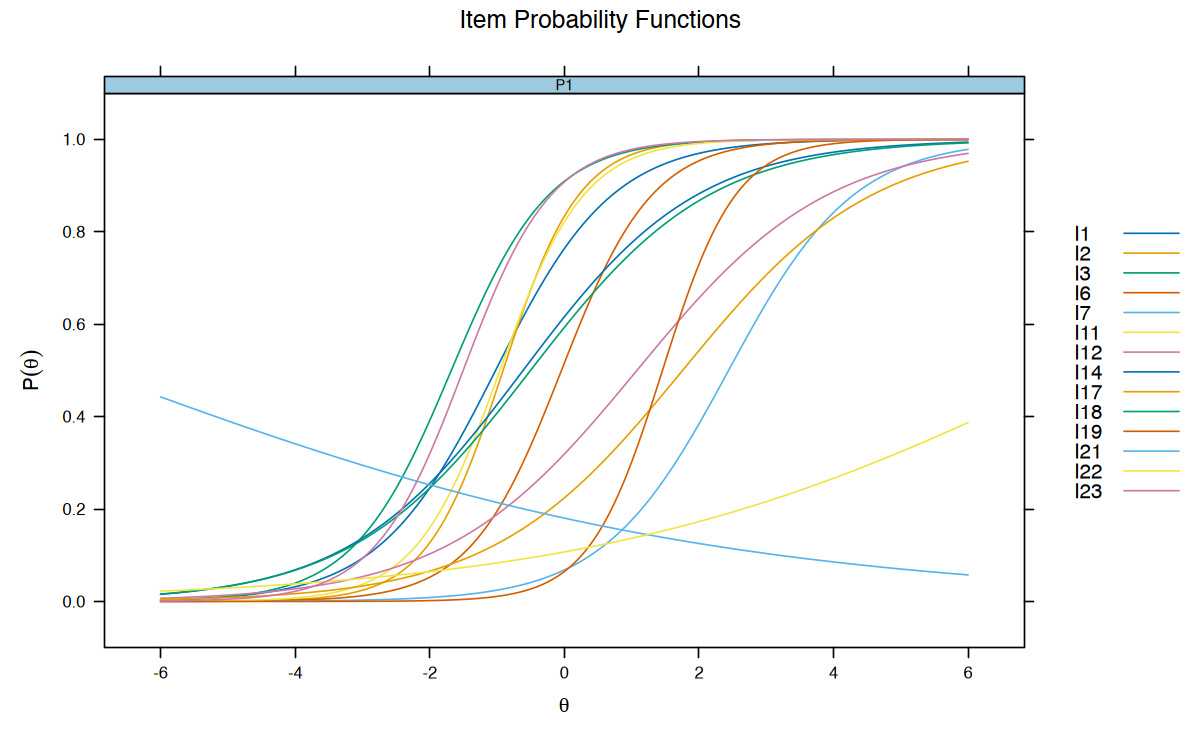

In [26]:
plot(mirt_2pl, type = "trace", facet_items = FALSE)

Utilizziamo la funzione `coef()` per ottenere le stime dei parametri degli item:

In [27]:
coef(mirt_2pl, IRTpars = TRUE, simplify = TRUE)

,a,b,g,u
I1,1.147,-1.0215,0,1
I2,1.769,-0.9107,0,1
I3,1.372,-1.6798,0,1
I6,1.479,-0.0425,0,1
I7,1.071,2.4414,0,1
I11,1.594,-0.9570,0,1
I12,0.703,1.0789,0,1
I14,0.771,-0.6124,0,1
I17,0.707,1.7577,0,1
I18,0.750,-0.5019,0,1


Le stime includono:

- $a$: parametro di discriminazione,
- $b$: parametro di difficoltà,
- $g$ e $u$: parametri opzionali per la pseudo-chance e il limite superiore (non rilevanti per il modello 2PL).

**Confronto tra Modello 1PL e Modello 2PL**

Per verificare quale modello si adatta meglio ai dati, possiamo confrontare il modello 1PL ($\alpha$ fisso per tutti gli item) con il modello 2PL ($\alpha$ variabile) utilizzando la funzione `anova()`:

In [30]:
anova(mirt_rm, mirt_2pl)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mirt_rm,5663,5675,5687,5723,-2816,NA,NA,NA
mirt_2pl,5575,5598,5619,5687,-2760,114,13,0



- Il **modello 2PL** ha valori di AIC, BIC e log-likelihood migliori rispetto al modello 1PL, indicando un adattamento più accurato ai dati.
- Il test di $X^2$ e il p-value ($p = 0$) suggeriscono che le differenze tra i modelli sono significative: il modello 2PL spiega meglio la variazione nei dati.
- Questo risultato implica che gli item differiscono non solo per la difficoltà ($b$), ma anche per la discriminazione ($a$).

In conclusione, il modello 2PL supera il modello 1PL in termini di adattamento ai dati quando gli item hanno diverse capacità di discriminazione. 
:::

## Modello 3PL

Il **modello IRT a tre parametri (3PL)** è una generalizzazione del modello 2PL che introduce un terzo parametro, noto come **guessing** ($g$), per tener conto della probabilità di indovinare una risposta corretta. Questo parametro è particolarmente utile nei test a scelta multipla, dove un rispondente con abilità latente molto bassa potrebbe comunque rispondere correttamente a un item semplicemente per caso.

**Formula del modello 3PL**

La probabilità di risposta corretta è definita come:

$$
P(X_i = 1 \mid \theta, a_i, b_i, g_i) = g_i + (1 - g_i) \frac{1}{1 + \exp(-a_i (\theta - b_i))},
$$

dove:

- $\theta$: livello di abilità del rispondente,
- $a_i$: parametro di discriminazione dell’item $i$,
- $b_i$: parametro di difficoltà dell’item $i$,
- $g_i$: parametro di guessing, che rappresenta il limite inferiore della curva ICC.

**Caratteristiche principali del modello 3PL**

1. **Parametro di guessing ($g$)**:

   - Introduce un asintoto inferiore maggiore di zero nella curva ICC.
   - Ad esempio, un item con $g = 0.25$ implica che anche i rispondenti con abilità molto bassa ($\theta \to -\infty$) abbiano una probabilità di risposta corretta pari almeno al 25%, corrispondente alla probabilità di indovinare in un test a scelta multipla con quattro opzioni.

2. **Flessibilità rispetto al modello 2PL**:

   - Il modello 3PL può rappresentare meglio il comportamento degli item, includendo la possibilità di indovinare le risposte.
   - La presenza del parametro $g$ rende il modello più complesso e richiede un numero maggiore di dati per ottenere stime affidabili.

3. **Curve caratteristiche degli item (ICC)**:

   - Con il parametro $g$, la probabilità di risposta corretta non scende mai al di sotto del valore $g$, anche per i rispondenti con abilità molto bassa.

::: {#exr-}

Utilizziamo il pacchetto **mirt** per stimare i parametri del modello 3PL:

In [31]:
mirt_3pl <- mirt(responses, 1, "3PL")

Iteration: 41, Log-Lik: -2740.210, Max-Change: 0.00009


Le curve ICC possono essere visualizzate con il comando:

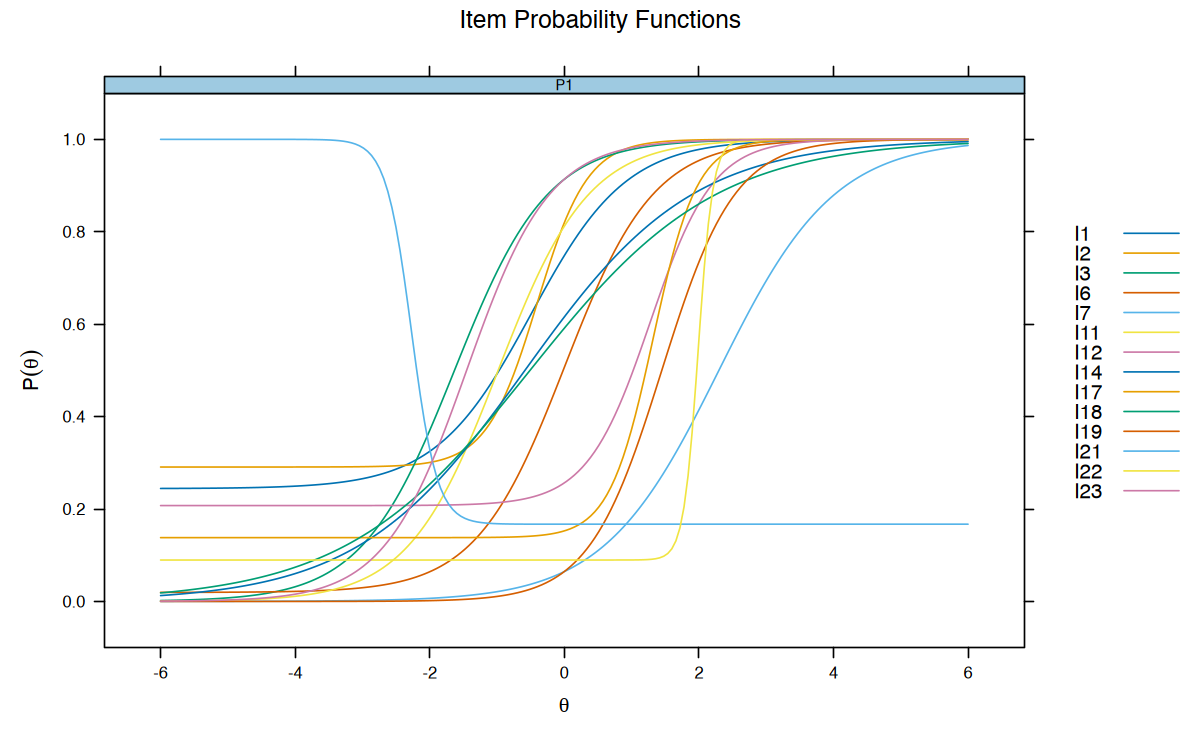

In [32]:
plot(mirt_3pl, type = "trace", facet_items = FALSE)

Utilizziamo la funzione `coef()` per ottenere le stime dei parametri degli item ($a$, $b$, $g$):

In [33]:
coef(mirt_3pl, IRTpars = TRUE, simplify = TRUE)

,a,b,g,u
I1,1.410,-0.49321,2.44e-01,1
I2,2.667,-0.40358,2.91e-01,1
I3,1.445,-1.63253,1.22e-04,1
I6,1.514,0.00861,1.95e-02,1
I7,1.163,2.29703,1.18e-05,1
I11,1.487,-0.98362,1.45e-05,1
I12,2.131,1.27506,2.07e-01,1
I14,0.805,-0.58574,6.14e-05,1
I17,3.076,1.31998,1.38e-01,1
I18,0.724,-0.51032,4.10e-05,1


**Confronto tra modelli 2PL e 3PL**

In [36]:
anova(mirt_2pl, mirt_3pl)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mirt_2pl,5575,5598,5619,5687,-2760,NA,NA,NA
mirt_3pl,5564,5599,5631,5732,-2740,38.8,14,0.000394


- Il **modello 3PL** presenta un AIC inferiore rispetto al modello 2PL, suggerendo un miglior adattamento ai dati.
- Tuttavia, il BIC penalizza maggiormente la complessità del modello, favorendo leggermente il modello 2PL.
- La significatività del test $X^2$ ($p = 0.0004$) indica che il modello 3PL offre un miglioramento significativo rispetto al modello 2PL.

**Valutazione della bontà dell’adattamento**

Per verificare se il modello 3PL rappresenta adeguatamente i dati, utilizziamo la statistica $M2$:

In [37]:
M2(mirt_3pl)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,76.1,63,0.125,0.0228,0,0.0394,0.0453,0.975,0.983


- Il valore $p = 0.125$ indica che il modello 3PL non può essere rifiutato come rappresentazione adeguata dei dati.
- Il **RMSEA** inferiore a 0.05 (limite superiore: 0.039) suggerisce un buon adattamento.

**Adattamento degli item**

Utilizziamo la funzione `itemfit()` per calcolare statistiche che valutano quanto bene ciascun item si adatta al modello:

In [42]:
itemfit(mirt_3pl, "infit", method = "ML") # infit and outfit stats

Warning message:
"The following factor score estimates failed to converge successfully:
    127,128,169,180,189,233,263,298"


item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
I1,1.005,0.0842,0.983,-0.273
I2,0.865,-0.3667,0.873,-2.016
I3,0.876,-0.4039,0.909,-0.940
I6,0.981,-0.1451,0.916,-1.503
I7,0.783,-0.7974,0.896,-0.899
I11,1.462,2.3832,0.886,-1.567
I12,0.945,-0.9293,0.942,-1.157
I14,0.967,-0.5649,1.009,0.223
I17,0.784,-2.4566,0.807,-2.709


\
L'output riporta i valori di **infit** e **outfit** per ciascun item del modello 3PL, insieme ai relativi z-score ($z.\text{infit}$ e $z.\text{outfit}$), che indicano la distanza standardizzata tra i valori osservati e attesi. 

- **Valori attesi per infit e outfit**:

  - **Buon adattamento**: Valori compresi tra **0.7 e 1.3** indicano un buon adattamento dell'item al modello.
  - **Problemi di adattamento**:
    - Valori inferiori a 0.7: L'item è troppo prevedibile o ridondante.
    - Valori superiori a 1.3: L'item presenta risposte inaspettate rispetto al modello.

- **Interpretazione degli z-score**:

  - $|z| \leq 2$: L'adattamento è accettabile.
  - $|z| > 2$: L'item potrebbe non adattarsi bene al modello.

**Analisi dei risultati**
1. **Item con buon adattamento (infit e outfit accettabili)**:

   - **I1**:
     - Outfit: $1.005$ (ottimo),
     - Infit: $0.983$ (ottimo),
     - $z.\text{outfit} = 0.084$, $z.\text{infit} = -0.273$: L'item si adatta bene.
   - **I3, I6, I14, I18, I21**:
     - Valori di infit e outfit compresi tra 0.7 e 1.3, con $|z|$ accettabili.

2. **Item con infit e outfit problematici**:

   - **I11**:
     - Outfit: $1.462$ (superiore a 1.3),
     - $z.\text{outfit} = 2.383$: Indica risposte inaspettate per rispondenti con livelli di abilità lontani dalla difficoltà dell'item.
     - Infit: $0.886$ (accettabile), ma $z.\text{infit} = -1.567$: Non critico, ma da monitorare.
   - **I17**:
     - Outfit: $0.784$ (accettabile),
     - Infit: $0.807$, ma $z.\text{infit} = -2.709$: Indica discrepanze significative per rispondenti con abilità vicine alla difficoltà dell'item.

3. **Item con adattamento troppo prevedibile (infit e outfit < 0.7)**:
   - Nessun item ha valori inferiori a 0.7, quindi non ci sono problemi di prevedibilità o ridondanza.

4. **Item con discrepanze significative da monitorare**:

   - **I19**:
     - Outfit: $0.590$ (inferiore a 0.7, troppo prevedibile),
     - Infit: $0.816$, con $z.\text{infit} = -2.165$: L'item potrebbe essere ridondante o eccessivamente facile.

**Raccomandazioni**

- La maggior parte degli item si adatta bene al modello, con valori di infit e outfit entro l'intervallo accettabile.
   
- Verificare il contenuto e il formato degli item **I11** e **I17**. Potrebbero contenere ambiguità o comportarsi in modo non previsto per alcuni livelli di abilità.
- L'item **I19** potrebbe essere troppo facile o ridondante. Considerare la revisione o la rimozione.
- Per gli item con discrepanze significative ($|z| > 2$), si può considerare un'analisi qualitativa e, se necessario, modificare o rimuovere gli item per migliorare l'affidabilità complessiva del test.

In sintesi, il test mostra un buon adattamento generale al modello 3PL, ma alcuni item richiedono attenzione per garantire una misurazione più precisa e affidabile.

:::

## Invarianza di Gruppo dei Parametri degli Item nella IRT

Una delle proprietà distintive della IRT è l’**invarianza di gruppo dei parametri degli item**, che garantisce che i parametri di un item (difficoltà, discriminazione, guessing) siano intrinseci all’item stesso, indipendentemente dal livello di abilità della popolazione esaminata. Questo principio può essere descritto nei seguenti termini:

**Principio di Invarianza**

Consideriamo due gruppi di esaminandi estratti dalla stessa popolazione:

- **Gruppo 1**: Livelli di abilità compresi tra -3 e -1 (media = -2).
- **Gruppo 2**: Livelli di abilità compresi tra +1 e +3 (media = +2).

Attraverso la **stima a massima verosimiglianza**:

- Si calcola la proporzione di risposte corrette per ciascun livello di abilità in entrambi i gruppi.
- Si adatta una curva caratteristica dell’item (ICC) ai dati, ottenendo stime dei parametri come $a = 1.27$ (discriminazione) e $b = 0.39$ (difficoltà).

Il punto chiave è che queste stime rimangono **costanti**:

- Gli stessi valori di $a$ e $b$ sarebbero ottenuti analizzando esclusivamente i dati del **Gruppo 1** o del **Gruppo 2**.
- Questo dimostra che i parametri sono una proprietà dell’item stesso e non dipendono dalla distribuzione di abilità del gruppo esaminato.

::: {#exr-}

Il seguente script R visualizza l’invarianza dei parametri tra due gruppi con abilità diverse utilizzando una curva ICC:

In [50]:
groupinv <- function(mdl, t1l, t1u, t2l, t2u) {
    if (missing(t1l)) t1l <- -3
    if (missing(t1u)) t1u <- -1
    if (missing(t2l)) t2l <- 1
    if (missing(t2u)) t2u <- 3
    theta <- seq(-3, 3, .1875)
    f <- rep(21, length(theta))
    wb <- round(runif(1, -3, 3), 2)
    wa <- round(runif(1, 0.2, 2.8), 2)
    wc <- round(runif(1, 0, .35), 2)
    if (mdl == 1 | mdl == 2) {
        wc <- 0
    }
    if (mdl == 1) {
        wa <- 1
    }
    for (g in 1:length(theta)) {
        P <- wc + (1 - wc) / (1 + exp(-wa * (theta - wb)))
    }
    p <- rbinom(length(theta), f, P) / f
    lowerg1 <- 0
    for (g in 1:length(theta)) {
        if (theta[g] <= t1l) {
            lowerg1 <- lowerg1 + 1
        }
    }
    upperg1 <- 0
    for (g in 1:length(theta)) {
        if (theta[g] <= t1u) {
            upperg1 <- upperg1 + 1
        }
    }
    theta1 <- theta[lowerg1:upperg1]
    p1 <- p[lowerg1:upperg1]
    lowerg2 <- 0
    for (g in 1:length(theta)) {
        if (theta[g] <= t2l) {
            lowerg2 <- lowerg2 + 1
        }
    }
    upperg2 <- 0
    for (g in 1:length(theta)) {
        if (theta[g] <= t2u) {
            upperg2 <- upperg2 + 1
        }
    }
    theta2 <- theta[lowerg2:upperg2]
    p2 <- p[lowerg2:upperg2]
    theta12 <- c(theta1, theta2)
    p12 <- c(p1, p2)
    par(lab = c(7, 5, 3))
    plot(theta12, p12,
        xlim = c(-3, 3), ylim = c(0, 1),
        xlab = "Ability", ylab = "Probability of Correct Response"
    )
    if (mdl == 1) {
        maintext <- paste("Pooled Groups", "\n", "b=", wb)
    }
    if (mdl == 2) {
        maintext <- paste("Pooled Groups", "\n", "a=", wa, "b=", wb)
    }
    if (mdl == 3) {
        maintext <- paste(
            "Pooled Groups", "\n",
            "a=", wa, "b=", wb, "c=", wc
        )
    }
    par(new = "T")
    plot(theta, P,
        xlim = c(-3, 3), ylim = c(0, 1), type = "l",
        xlab = "", ylab = "", main = maintext
    )
}

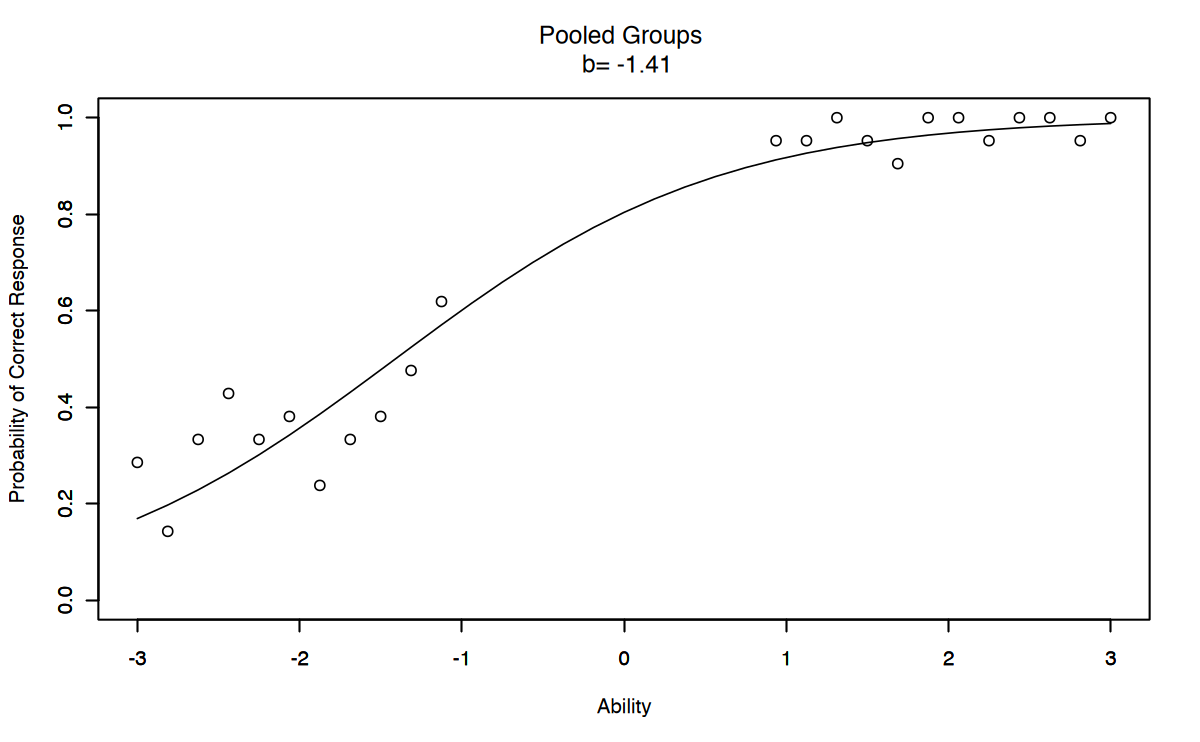

In [51]:
set.seed(1)
groupinv(1, -3, -1, 1, 3)

Questo genera due segmenti di una curva caratteristica dell’item, uno per ciascun gruppo. Le stime dei parametri restano coerenti per entrambi i gruppi, confermando l’invarianza di gruppo.

:::


### Confronto con la Teoria Classica dei Test 

Nella Teoria Classica dei Test (TCT), la difficoltà di un item viene calcolata come la proporzione complessiva di risposte corrette. Questo valore è fortemente influenzato dal livello medio di abilità del gruppo esaminato, rendendo la difficoltà dell’item dipendente dalla popolazione. Al contrario, nella Teoria della Risposta all’Item (IRT), la difficoltà di un item (\( b \)) è una proprietà intrinseca e indipendente dalla popolazione che risponde al test. Questa caratteristica rende la IRT particolarmente adatta per confronti tra popolazioni diverse.

Tuttavia, l’invarianza dei parametri degli item presenta alcune limitazioni. Sebbene teoricamente i parametri siano invarianti, le stime empiriche possono variare a causa dell’errore campionario. La precisione di queste stime dipende dalla dimensione del campione e dalla varianza dei dati. Inoltre, l’invarianza è valida solo se l’item misura lo stesso tratto latente in entrambi i gruppi. Se un item viene utilizzato per valutare un tratto diverso o in contesti non comparabili, l’invarianza dei parametri non può essere garantita.

La curva caratteristica dell’item (ICC) rappresenta la probabilità di risposta corretta in funzione dell’abilità latente. L’invarianza implica che la forma e i parametri della curva non siano influenzati dalla distribuzione delle abilità all’interno della popolazione. Questo significa che anche analizzando solo un segmento limitato della curva, è possibile stimare accuratamente i parametri di un item, confermando la robustezza della IRT rispetto alla distribuzione degli esaminandi.

In conclusione, l’invarianza di gruppo dei parametri degli item è una caratteristica fondamentale della IRT, che consente di confrontare i risultati tra popolazioni diverse senza essere condizionati dalle differenze nei livelli di abilità. Questo principio garantisce che i parametri siano intrinseci all’item e non dipendano dal gruppo esaminato. Tuttavia, bisogna considerare che le stime empiriche sono soggette a errore campionario e che l’invarianza è valida solo quando l’item è utilizzato per misurare lo stesso tratto latente in popolazioni comparabili.

## Considerazioni Conclusive

Il pacchetto `mirt` (Chalmers, 2021) offre funzionalità per l'adattamento di una varietà di modelli IRT, inclusi i modelli Rasch, 2PL e 3PL, nonché diversi modelli per risposte politomiche utilizzando la massima verosimiglianza marginale. In questo capitolo, abbiamo esplorato come sia possibile confrontare i modelli 1PL, 2PL e 3PL, che sono stati adattati ai dati usando `mirt`, attraverso il test del rapporto di verosimiglianza e gli indici di informazione.

## Session Info

In [49]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.1.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] latex2exp_0.9.6   psychotools_0.7-4 ggmirt_0.1.0      TAM_4.2-21       
 [5] CDM_8.2-6         mvtnorm_1.3-2     mirt_1.43         lattice_0.22-6   
 [9] eRm_1.0-6         MASS_7.3-61       viridis_0.6.5     viridisLite_0.4.2
[13] ggpubr_0.6.0      ggExtra_0.10.1    gridExtra_2.3     patchwork_1.3.0  
[17] bayesplot_1.11.1  semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-19    
[21] psych_2.4.6.26    scales_1.3.0      markdown_1.13     knitr_1.49     